In [1]:
# Main Analysis.

In [2]:
import import_ipynb

from Core import (columns_with_empty_data, read_all_data, correlation_heatmap,plot_most_correlated,
plot_regplot, count_plot, plot_stack, plot_log, plot_monthly_sales_year_distibution, model_results, 
plot_residuals, replace_column_values, replace_na_with_none, replace_column_values, replace_na_with_zero,
replace_na_with_mode, replace_categorical_values, caluclate_cumsum, plot_pca, plot_pca_variance)
#################################################################
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet,Lasso, LinearRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
#################################################################
import xgboost as xgb
import lightgbm as lgb
from mlxtend.regressor import StackingRegressor
import matplotlib.pyplot as plt

importing Jupyter notebook from Core.ipynb


The following analysis is an overview of The Ames Housing dataset which, was compiled by Dean De Cock for use in data science education. Predicting the house prices is the main goal for this project. To do that a regression analysis has taken place and it was chosen as it requires a substantial amount of effort to understand and clean the data. The analysis starts with an explanatory data analysis, so that a better understanding of the data is obtained. After that a principal component analysis is provided, as having too many variables can cause problems for other multivariate techniques that the data scientists may want to apply to the data (Everitt, 2011) and then follows the predictions of the different models and model evaluation metrics. 

For carrying out this research the CRISP-DM methodology is used. According to Rüdiger (2000) “data mining needs a standard approach which will help translate business problems into data mining tasks” and according to Champan et al (2000) CRISP-DM is useful when the main purpose is to increase knowledge of the data, while the data are organised and presented in a productive way.

The choose language of this project is Python as it is ideal for Machine Learning, since Python provides a lot of built in packages that are helpful and convinient to use. In addition, a few tests have been writen to ensure quality and a dashboard has been created for interactive usage of the system.

# Explanatory Data Analysis (EDA)

## Datasets - Iteration 1

To begin with, there are two datasets. The first dataset contains the training data and the second dataframe contains the training data. Both of them have the same variables, except the predicted variable SalePrice. The dimensions of the training dataframe are:

In [3]:
# Load Data
%store -r train_data
%store -r test_data
%store -r all_data

In [4]:
all_data.shape

(2919, 81)

The type of the variables is numeric in both cases(continue and discrete values) and characters (discrete values). 

In [5]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

For the numeric variables the describe function provides the range of the data, i.e. minimum, maximum and quartiles. A few of the most useful (numeric) variables are:

In [6]:
train_data.iloc[:,[1,3,19,46,77,8,80]].describe()

MSSubClass  LotFrontage    YearBuilt    GrLivArea       YrSold  \
count  1460.000000  1201.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958  1971.267808  1515.463699  2007.815753   
std      42.300571    24.284752    30.202904   525.480383     1.328095   
min      20.000000    21.000000  1872.000000   334.000000  2006.000000   
25%      20.000000    59.000000  1954.000000  1129.500000  2007.000000   
50%      50.000000    69.000000  1973.000000  1464.000000  2008.000000   
75%      70.000000    80.000000  2000.000000  1776.750000  2009.000000   
max     190.000000   313.000000  2010.000000  5642.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000

It is observed that the data has high standard deviation, which means high variance. Moreover, there are variables like MiscFeature, Fence and PoolQC, which have many missing values, but NA in most of the cases actually means the absence of a utility, for instance NA in PoolQC means that there is no pool in the house.

In [7]:
columns_with_empty_data(train_data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

The following correlation map is very useful to highlight the most correlated variables in the data table. Low values are represented with in black, while high values are represented in white. It is observed that OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea, SalePrice variables are highly correlated.

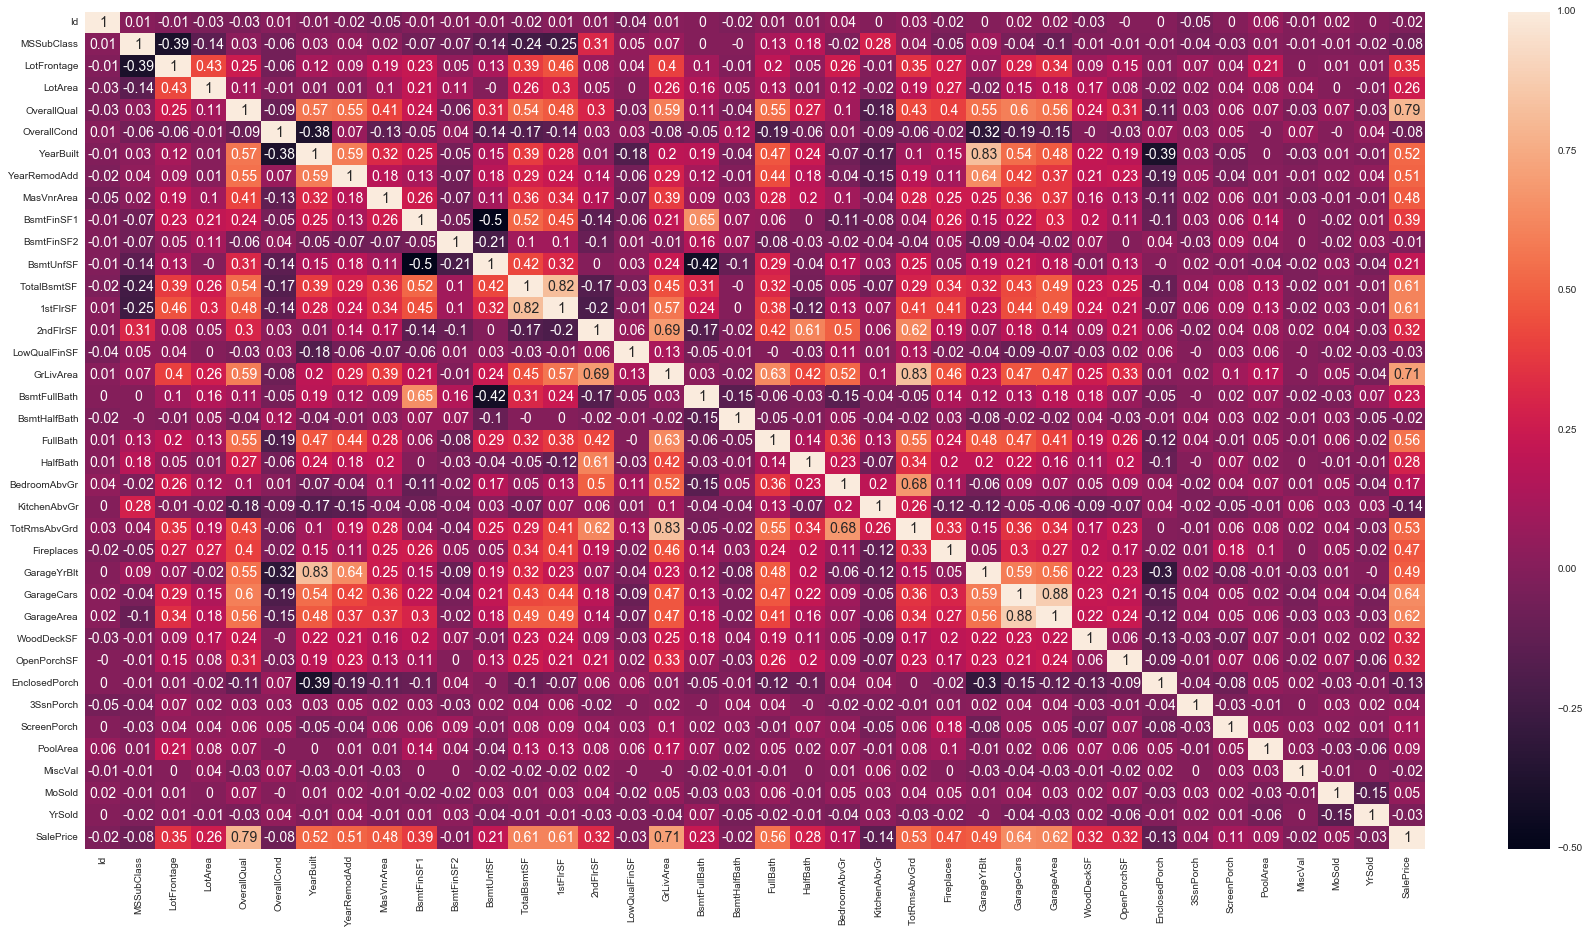

In [8]:
correlation_heatmap(train_data)

The next graph shows the distribution of these variables and indicates that 

    * TotalBsmtSF has a strong positive linear relationship with 1stFlrSF, GrLivArea and SalePrice.
    * 1stFlrSF has a strong positive linear relationship with GarageArea and SalePrice.
    * GrLivArea has a strong positive linear relationship with SalePrice.
    * GarageArea has a strong positive linear relationship with SalePrice.

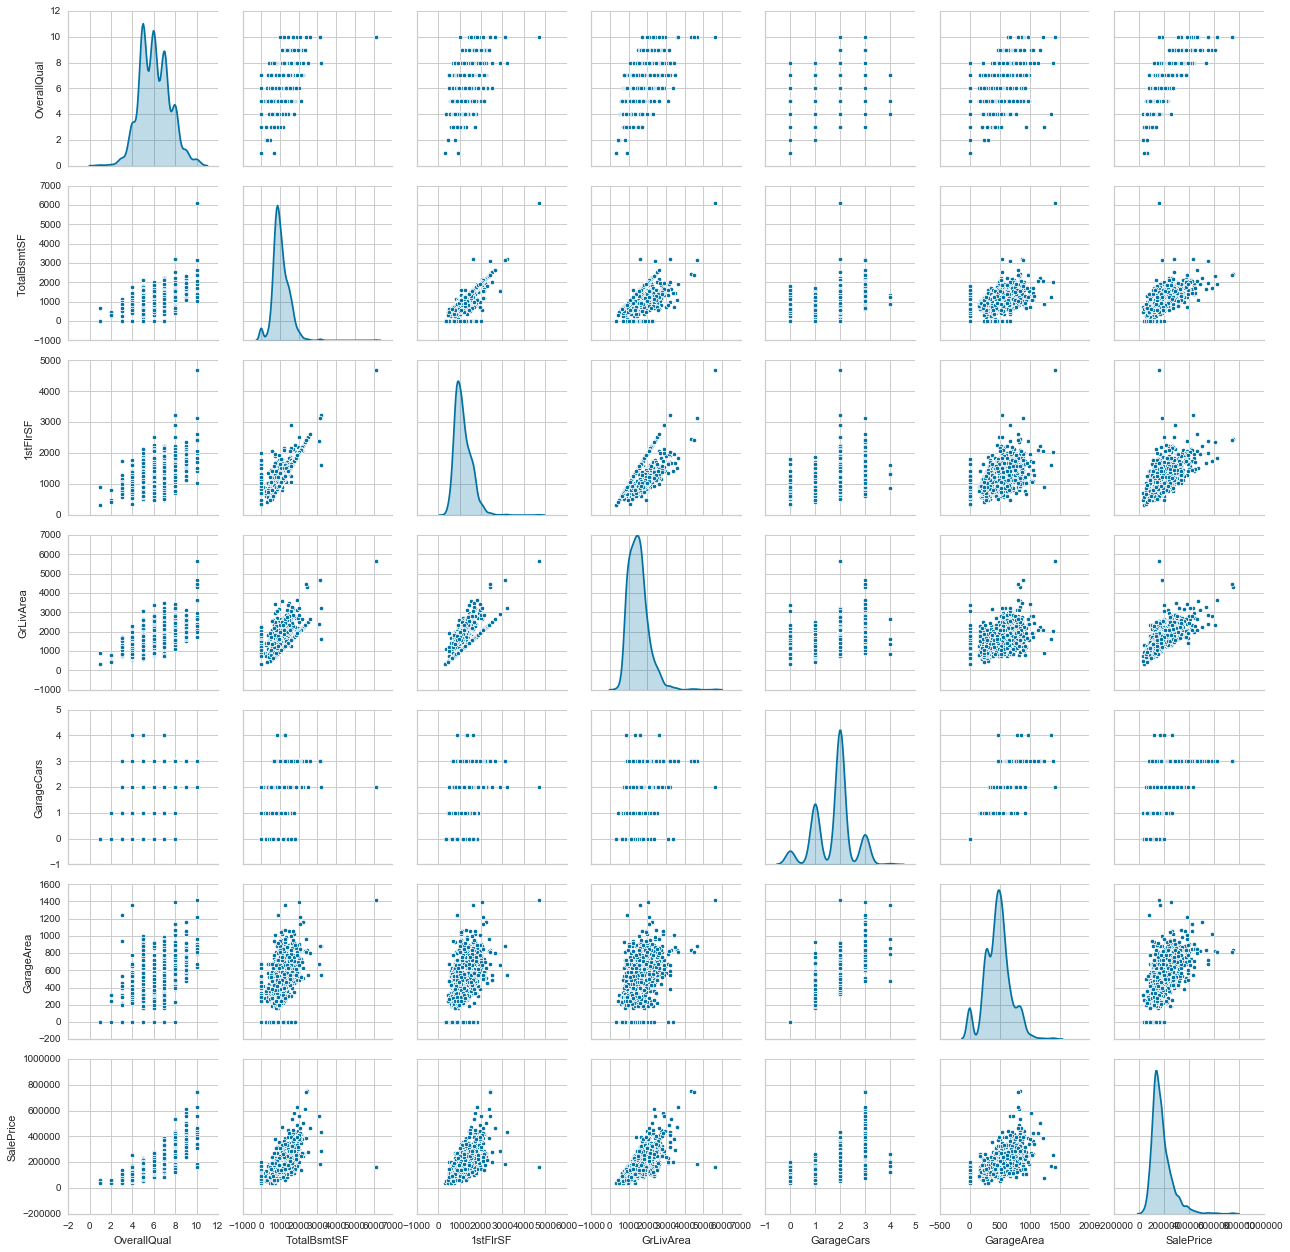

In [9]:
plot_most_correlated(train_data)

In [10]:
# Data Processing

## Clean Data

The process of cleaning the data is not simple in this project, because the data are not empty and the data are continuous or discrete and numeric or characters. According to Sebastian Raschka and Vahid Mirjalili (2017), the missing values should be replaced with NA and then filled with the mean value of the column. If empty values existed then the missing values could be filled with the mean or median of each row for the continuous values or the most frequent value for the categorical variables (Sebastian et al, 2017) However, there are features that should still be processed, since in this project NA could mean non-existance, instead of not avalaible.

Before starting to make changes, though, outliers should be found, if they exist, and decisions made on what actions should be taken. The plots of SalePrice against GrLivArea and OverallQual show that there are only two outliers (SalePrice against GrLivArea). These two houses does not follow the trend (strong positive linear relationship), which could be explained by these houses being located in an area that is not ideal or far away from the city Center, for instance their location could be in an agricultural area.

In [11]:
# Remove outliers

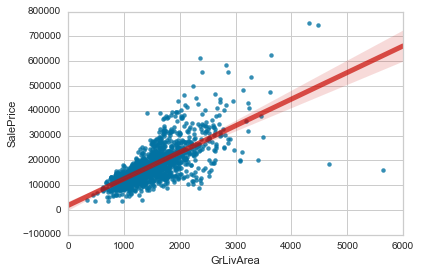

In [12]:
plot_regplot(train_data, "GrLivArea", "SalePrice")

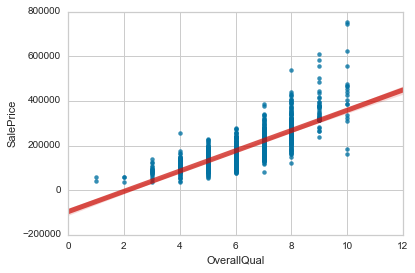

In [13]:
plot_regplot(train_data, "OverallQual","SalePrice")

In [14]:
# Removing the outliers
train_data.drop(train_data[(train_data['GrLivArea']>=4000) & (train_data['SalePrice']<=300000)].index,
                inplace = True)

train_data.drop(train_data[train_data['1stFlrSF']>=4000].index,inplace=True)

train_data.drop(train_data[train_data['TotalBsmtSF']>=5000].index,inplace=True)

Since houses prices are highly related with location and the quality of the houses, identifying these areas could be beneficial for future investigations in the data and a better understanding of the sales during that period will be obtained.

According to figure 1, the zone with the highest number of sales was a residential low density zone. The difference between this zone and the rest are enormous as the sales rate reaches almost 80%.

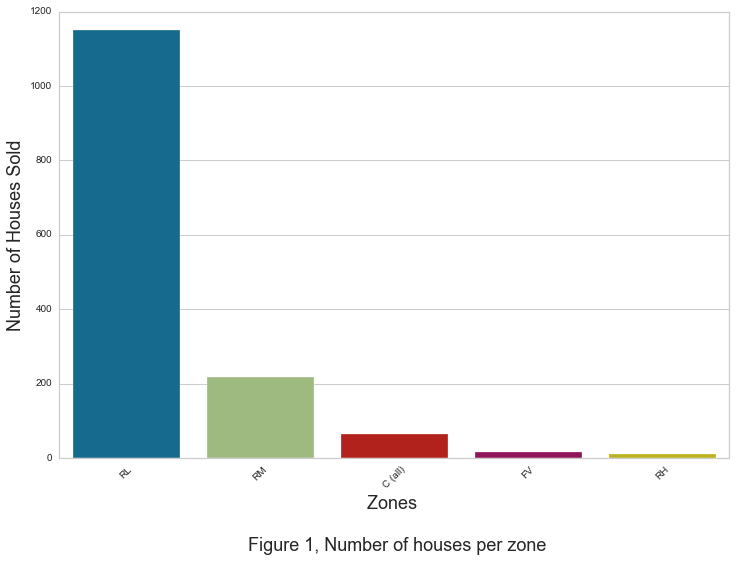

In [15]:
count_plot(train_data, 'MSZoning', '', "Zones \n\n Figure 1, Number of houses per zone", 'Number of Houses Sold')

This diffence is observed in the neighborhoods as well, as in figure 2 it is clear that the first 5 neighbourhoods dominates the other 20 neighborhoods.

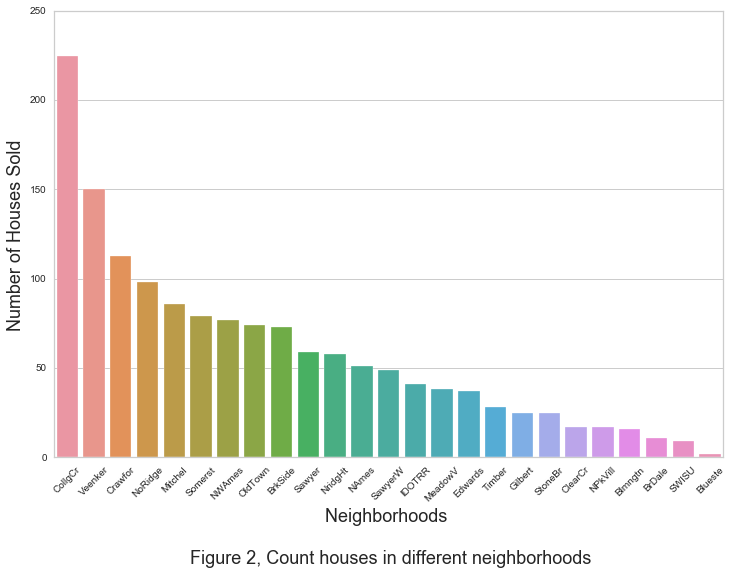

In [16]:
count_plot(train_data, 'Neighborhood', '','Neighborhoods \n\n Figure 2, Count houses in different neighborhoods', 
           'Number of Houses Sold')

The utilities, for example water and electricity, were the same for all houses, which means that utilities is not an important variable in our dataset and we could exlude them if it is desired, so that the model's complexity and the computation time are reduced.

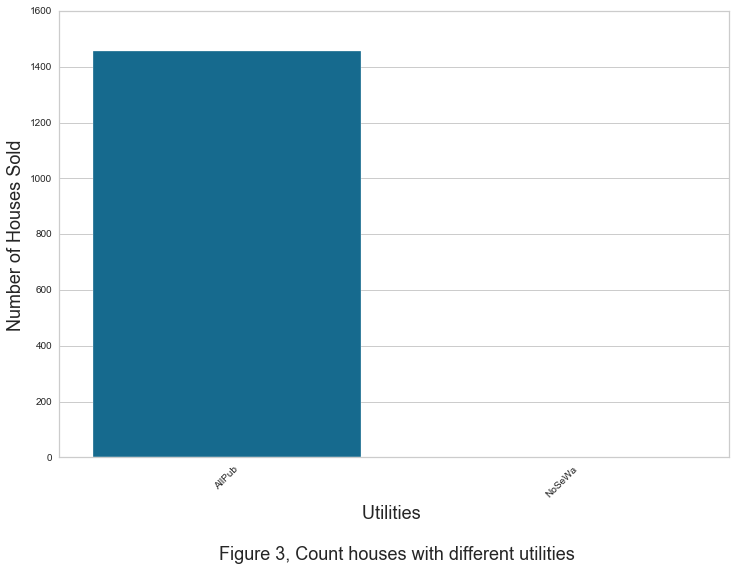

In [17]:
count_plot(train_data, 'Utilities', '', 'Utilities \n\n Figure 3, Count houses with different utilities', 'Number of Houses Sold')

The overall quality of the houses in each neighbourhood was concidered good or very good in most cases. However the neighbouhoods that really stand out are CollgCr, NoRidge, NridgHt, Somerst, StoneBr and Timber, because most of the houses were in excellent condition and the quality was extremely high.

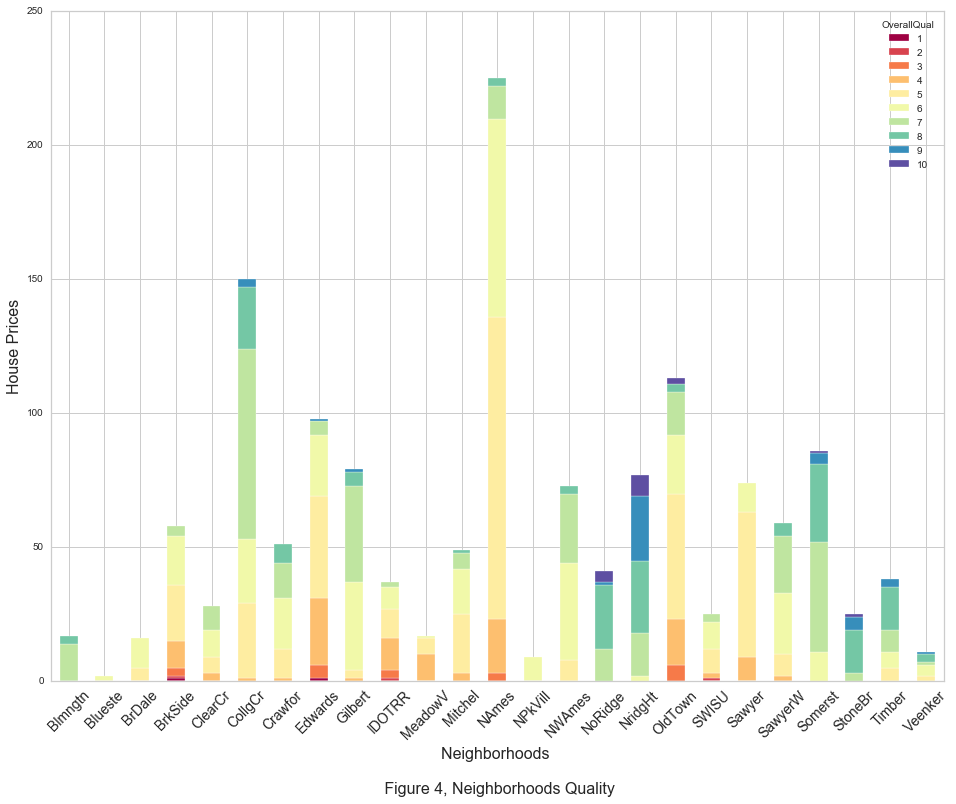

In [18]:
plot_stack(train_data, ['Neighborhood', 'OverallQual'], title='', x_label='Neighborhoods \n\n Figure 4, Neighborhoods Quality', 
           y_label='House Prices')

To know more about the data, the sales distribution over the years and for the months have been plotted. Apparently during summer time people bought more houses and this happened for all years except 2010. The drop-in sales might have happened due to the financial crisis during that period. As for the sales distribution it is does not follow the normal distribution.

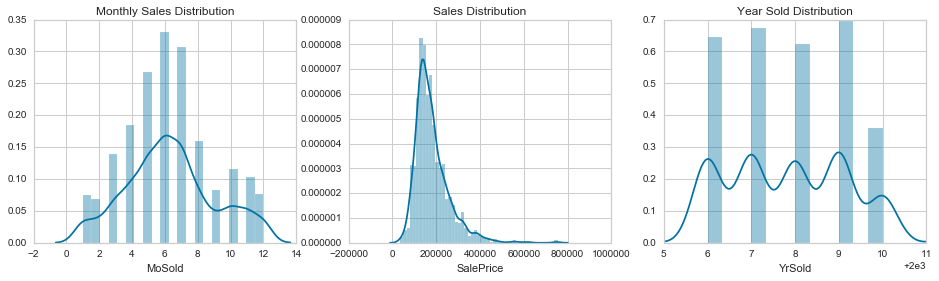

In [19]:
plot_monthly_sales_year_distibution(train_data)

For this reason the log-transformation is used so that the skewness is reduced in the data, since log-transformation is widely used when dealing with skewed data.  In addition, the log transformation has three advantages:
    
    * it is easier to interpret patterns in the data.
    * it makes the data more normalized.
    * it makes the calculation easier and therefore speeds up the whole process.


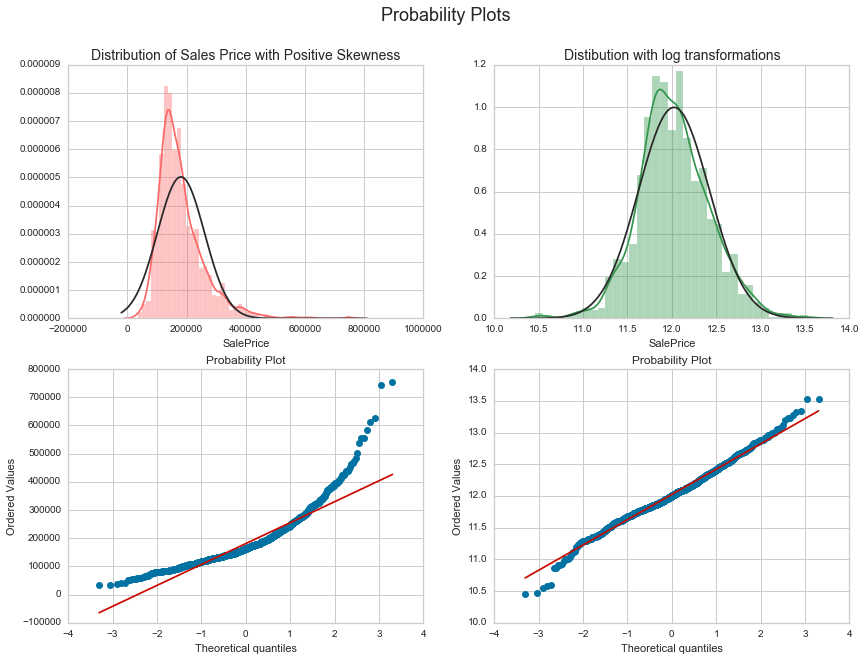

In [20]:
plot_log(train_data, 'SalePrice', 'Distribution of Sales Price with Positive Skewness')

In the previous graph the predicted variable SalePrice follows the normal distribution after the log-transformation and the theoretical quantiles lies upon the theoretical line, while the distribution before the log-transformation is not normal and the data points are far from the theoretical line.

Similarly for the distribution of the GrLivArea variable (living area square feet), the log-transformation normalises the data.

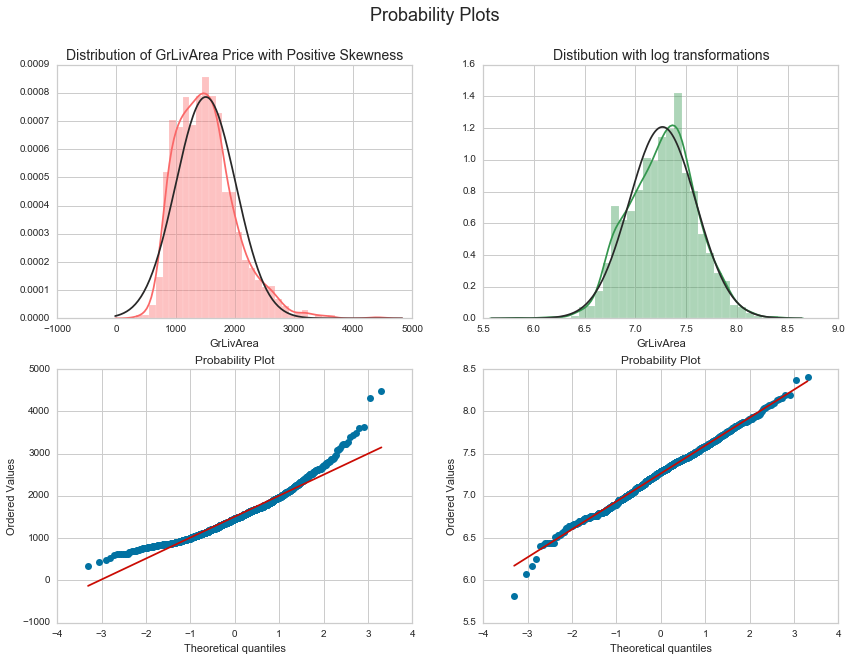

In [21]:
plot_log(train_data, 'GrLivArea', 'Distribution of GrLivArea Price with Positive Skewness')

In [22]:
# Feature Transformation/Engineering

# Feature Transformation/Engineering - Iteration 2

As noted, it is important to change the NA values in the dataset, so that the values will have a meanigful representation of the data and the computations are fast and effeciently. To have more accurarcy in the data transformation the training data and the test data have been combined into one data frame, so that we have more observations and the mean or median values are more accurate.

There are variables like PoolQC and GarageType and Fence where NA means no pool and no garage. In these variables the NA is replaced with the word none.

In [23]:
# Columns where NaN values have the meaning e.g. no pool etc.
columns_with_meaningful_na = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']

replace_na_with_none(all_data, columns_with_meaningful_na)

While the NA in the GarageYrBlt variable is replaced with the year that the house was built. This might not be 100% accurate. However, it is much better than having a mean or median value, or even worse no value at all.

In [24]:
all_data.loc[all_data.GarageYrBlt.isnull(),'GarageYrBlt'] = all_data.loc[all_data.GarageYrBlt.isnull(),'YearBuilt']

Other variables NA values, for instance GarageArea and MasVnrArea, have been replaced with zero, since the median or mean could lead us to a wrong assumption about these variables.

In [25]:
# All columns where missing values can be replaced with 0
columns_replace_with_zero = ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
            'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']

replace_na_with_zero(all_data, columns_replace_with_zero)

For the categorical variables such as MSZoning and Electrical the most common value is used, because their values are discrete, hence this is the best approach. However for variables like LotFrontage which are continuous, the average value is used for the NA values.

In [26]:
# All columns where missing values can be replaced with the mode (most frequently occurring value)
columns_replace_with_mode = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 
            'Functional', 'Utilities']

replace_na_with_mode(all_data, columns_replace_with_mode)

In [27]:
LotFrontage_mean = all_data['LotFrontage'].mean()
all_data.loc[all_data.LotFrontage.isnull(),'LotFrontage'] = LotFrontage_mean

Finally the rest of the categorical values have been replaced with integer numbers starting from zero (Raschka, 2017).

In [28]:
# Remaining Nan values
cols_with_na = all_data.drop('SalePrice',axis=1).isnull().sum()
cols_with_na = cols_with_na[cols_with_na>0]
rows_with_na = all_data.drop('SalePrice',axis=1).isnull().sum(axis=1)
rows_with_na = rows_with_na[rows_with_na>0]

# fill remaining nans with mode in that column
for col in cols_with_na.index:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

In [29]:
replace_column_values(all_data, ["BsmtCond", "GarageQual", "GarageCond", "KitchenQual", 
                       "FireplaceQu", "BsmtQual", "ExterCond", "ExterQual", "PoolQC"], 
                      {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

replace_column_values(all_data, ["Heating", "HeatingQC"], {"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

replace_column_values(all_data, ["BsmtExposure"],{"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})

replace_column_values(all_data, ["BsmtFinType1", "BsmtFinType2"], {"None":0, "Unf":1, "LwQ":2, "Rec":3,
                                                                   "BLQ":4, "ALQ":5, "GLQ":6})

replace_column_values(all_data, ["CentralAir"], {"N":0, "Y":1})

replace_column_values(all_data, ["Fence"], {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4})

replace_column_values(all_data, ["Functional"], {"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5,
                                                 "Min1":6, "Typ":7})

replace_column_values(all_data, ["GarageFinish"], {"None":0, "Unf":1, "RFn":2, "Fin":3})

replace_column_values(all_data, ["GarageType"], {"None":0, "Detchd":1, "CarPort":2, "BuiltIn":3, "Basment":4,
                                                 "Attchd":5, "2Types":6})
    
replace_column_values(all_data, ["Utilities"], {"ELO":0, "NoSeWa":1, "NoSewr":2, "AllPub":3})

replace_column_values(all_data, ["PavedDrive"], {"N":0, "P":1, "Y":2})

In [30]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [31]:
categorical_values = ['Alley', 'BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 
                            'Exterior2nd', 'Foundation', 'Heating', 'HouseStyle', 'LotConfig', 'LotShape', 
                            'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 
                            'SaleCondition', 'SaleType', 'Street', 'LandSlope', 'PavedDrive', 'LandContour']

replace_categorical_values(all_data, categorical_values)

# PCA & Regression Analysis

Principal components analysis is an approach of dimensionality reduction. According to Sarkar et al 2014, PCA is a procedure by which numbers of correlated variables are transformed into a smaller number of uncorrelated variables.

Now that the data have been processed and the analysis is ready to take place, the data are  splitted again to train data and test data, based on the column SalePrice. If the observation contains a value above zero then it goes to the train dataset otherwise to the test dataset. The data have been scaled using regularization, as regularization is a very important technique in machine learning to prevent overfitting. Mathematically speaking, it adds a regularization term in order to prevent the coefficients from fitting so perfectly to overfit (Goodfellow 2016).

In [32]:
train_data = all_data[all_data['SalePrice']>0]
test_data = all_data[all_data['SalePrice'].isna()]

X = preprocessing.normalize(train_data, norm='l1')
X = pd.DataFrame(X, columns = train_data.columns)
X = X.drop('SalePrice', axis=1)

y = np.log(train_data['SalePrice'] )

The transformed data are presented in the following table:

In [33]:
test_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  \
0       896         0          0      2             2         3         3   
1      1329         0          0      2             3         3         3   
2       928       701          0      2             3         3         3   
3       926       678          0      2             3         3         3   
4      1280         0          0      2             2         0         3   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2   ...    SaleType  ScreenPorch  \
0             1       468.0       144.0   ...           3          120   
1             1       923.0         0.0   ...           3            0   
2             1       791.0         0.0   ...           3            0   
3             1       602.0         0.0   ...           3            0   
4             1       263.0         0.0   ...           3          144   

   Street  TotRmsAbvGrd  TotalBsmtSF  Utilities  WoodDeckSF  YearBuilt  \
0       0             5        882.0          3         140       1961   
1       0             6       1329.0          3         393       1958   
2       0             6        928.0          3         212       1997   
3       0             7        926.0          3         360       1998   
4       0             5       1280.0          3           0       1992   

   YearRemodAdd  YrSold  
0          1961    2010  
1          1958    2010  
2          1998    2010  
3          1998    2010  
4          1992    2010  

[5 rows x 81 columns]

The split of the data is done with cross validation, which randomly divides the data into 10 k folds (groups), of approximately equal size. The training set is set to be 80% of the training data while the test set is set to be the 20% of the training data.  According to James (2013), the ﬁrst fold is treated as a validation set, and the method is ﬁt on the remaining k − 1 folds and then the mean squared error is computed on the observations in the held-out fold.

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [35]:
# PCA

In PCA it is important to know the contribution to variance explanation of each principal component. In this analysis it seems that the first 10 PCA could explained 99% of the data variance.

In [36]:
caluclate_cumsum(X)

array([0.88879405, 0.95868976, 0.96768282, 0.97606483, 0.98344308,
       0.98965941, 0.99443688, 0.99639283, 0.99746232, 0.9984294 ,
       0.9989712 , 0.99935157, 0.99951493, 0.99966059, 0.99979097,
       0.99985982, 0.99992071, 0.999945  , 0.99996442, 0.99997598,
       0.99998567, 0.99999118, 0.99999542, 0.9999975 , 0.99999827,
       0.99999872, 0.99999899, 0.99999911, 0.9999992 , 0.99999928,
       0.99999935, 0.99999941, 0.99999947, 0.99999952, 0.99999957,
       0.9999996 , 0.99999963, 0.99999966, 0.99999969, 0.99999971,
       0.99999973, 0.99999975, 0.99999977, 0.99999979, 0.99999981,
       0.99999983, 0.99999984, 0.99999985, 0.99999987, 0.99999988,
       0.99999989, 0.9999999 , 0.99999991, 0.99999991, 0.99999992,
       0.99999993, 0.99999994, 0.99999994, 0.99999995, 0.99999995,
       0.99999996, 0.99999997, 0.99999997, 0.99999997, 0.99999998,
       0.99999998, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.     

The following plots show $PCA 1$ against $PCA 2$ and the number of PCA we could use if we want to reduce the number of explanatory variables.

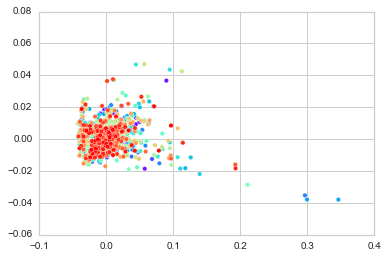

In [37]:
plot_pca(X, y)

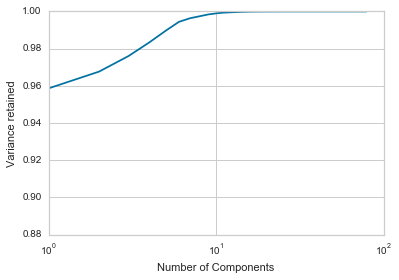

In [38]:
plot_pca_variance(X)

However, in this project no dimension reduction is applied, as the main goal is to create the most accurate prediction possible.

In [39]:
# Models

## Models & Evaluation
Regression is one of the most widely used techniques in applied statistics. A regression model is used to estimate the relationship among variables of a dataset (James, 2013). The main advantages of multiple regression analysis are that it

*	uses both continuous and categorical or nominal independent variables
*	examines trends in data (Kerlinger & Pedhazur, 1973)
*	has more flexibility and conceptual clarity (Kaufman & Sweet, 1974)
*	has more thoughtful hypotheses about the data (Thompson, 2006)

while the disadvantages are that

*	it looks at a relationship between the mean of the dependent variable and the independent variables (James, 2013)
*	it is sensitive to outliers (James, 2013)
*	data must be independent (Kerlinger et al, 1973)

To find the best model for predicting the house price different models have been used. For each model the system prints out the best score, the RMSE score and the cross validation score. The models that were used are: 

* Linear Regression
* Ridge Regression
* Decision Tree
* Random Forest
* Kernel ridge regression
* Gradient Boosting for regression
* XGB Regressor
* SVR

Linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Linear regression works well if the goal is prediction, forecasting and error reduction (Bishop 2006). 

In [40]:
parameters = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}

model_results(LinearRegression(), parameters, X_train, y_train, X_valid, y_valid)

Best Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
 Best Score: 0.7972976645900517
 RMSE Score: 0.4760447174294661
 Cross Validation Score: 0.946593615507515


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
 0.7972976645900517,
 0.4760447174294661,
 0.946593615507515)

When data suffer from multicollinearity Ridge regression is used for analyzing them. Ridge regression adds a degree of bias to the regression estimates, so it will reduce the standard errors (ncss-wpengine 2019).

In [41]:
parameters = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], 
              "solver" : ["auto"]}

model_results(Ridge(), parameters, X_train, y_train, X_valid, y_valid)

Best Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)
 Best Score: 0.9495686844312249
 RMSE Score: 0.08438698354138399
 Cross Validation Score: 0.9526165678385288


(Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=True, random_state=None, solver='auto', tol=0.001),
 0.9495686844312249,
 0.08438698354138399,
 0.9526165678385288)

Decision tree is useful when interpretability is important. Each result from the tree provides information and based on the Information Gain (IG) the algorithm decides how to proceed (Raschka, 2017).

In [42]:
parameters = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], 
              "min_samples_split" : [2, 3, 5, 10], "max_features" : ["auto", "log2"]}

model_results(DecisionTreeRegressor(), parameters, X_train, y_train, X_valid, y_valid)

Best Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
 Best Score: 0.9895379112748197
 RMSE Score: 0.044035241968194604
 Cross Validation Score: 0.9893231213569491


(DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 0.9895379112748197,
 0.044035241968194604,
 0.9893231213569491)

Random Forest is a collection of Decision Trees, but there are significant differences.
For example, a training dataset as input with features and labels will formulate some set of rules, which will be used to make the predictions. There is the n_estimators hyperparameter, which is the number of trees that are going to be built by the algorithm, before the voting take place. Another important hyperparameter is max_features, which is the maximum number of features Random Forest splits a node into .Moreover, random forest is good because it does not overfit, if there are enough trees.

In [43]:
parameters = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}

model_results(RandomForestRegressor(), parameters, X_train, y_train, X_valid, y_valid)

Best Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
 Best Score: 0.9910418600665623
 RMSE Score: 0.041263058735025386
 Cross Validation Score: 0.990968517116381


(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 0.9910418600665623,
 0.041263058735025386,
 0.990968517116381)

In [44]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=20, min_samples_split=10, 
                                   loss='huber', random_state =3)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=7, 
                             min_child_weight=1.5, n_estimators=6000,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=32, silent=1,
                             random_state =8)

svr = SVR(C=1, kernel='linear')

Elastic net is a combination of Lasso and lasso. Ridge regression is generally better than the LASSO for shrinkage, whilst the LASSO can perform variable selection. So the elastic net is good when considering big data.

In [45]:
parameters = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}

model_results(ENet, parameters, X_train, y_train, X_valid, y_valid)

Best Model: ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)
 Best Score: 0.953127455943974
 RMSE Score: 0.09105775225601219
 Cross Validation Score: 0.9549247143027244


(ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
       max_iter=1000, normalize=True, positive=False, precompute=False,
       random_state=3, selection='cyclic', tol=0.0001, warm_start=False),
 0.953127455943974,
 0.09105775225601219,
 0.9549247143027244)

 Kernel methods are a class of algorithms for pattern analysis and Kernel ridge regression (KRR) is a kernel-based regularized form of regression using the kernel trick.

In [61]:
model_results(KRR, {}, X_train, y_train, X_valid, y_valid)

Best Model: KernelRidge(alpha=0.6, coef0=2.5, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None)
 Best Score: 0.06012262870867996
 RMSE Score: 0.38951057393574523
 Cross Validation Score: 0.07705420976439474


(KernelRidge(alpha=0.6, coef0=2.5, degree=3, gamma=None, kernel='polynomial',
       kernel_params=None),
 0.06012262870867996,
 0.38951057393574523,
 0.07705420976439474)

Gradient boosting producing regression models consisting of collection of regressors. Gradient boosting learns a linear combination of M basis functions, which are themselves learned from a base hypothesis space H. Hence, the model learns from the small mistakes that have been made and then tries to improve the next model (IASC 1983).

In [46]:
model_results(GBoost, {}, X_train, y_train, X_valid, y_valid)

Best Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=20, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=4000,
             n_iter_no_change=None, presort='auto', random_state=3,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
 Best Score: 0.9844969916297363
 RMSE Score: 0.03768189290513015
 Cross Validation Score: 0.9909874070298889


(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='huber', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=4000,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
 0.9844969916297363,
 0.03768189290513015,
 0.9909874070298889)

XGBoost algorithm is an advanced implementation of the gradient boosting algorithm capable of dealing with all sorts of irregularities of data. XGBoost helps to reduce overfitting, since it has regularization and it has parallel processing, which makes the alogirth very fast. Moreover, XBoost can handle missing values and it can run a cross-validation and therefore it gets the exact optimum number of boosting iterations (Analytics Vidhya, 2019).

In [47]:
model_results(model_xgb, {}, X_train, y_train, X_valid, y_valid)

Best Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=7, min_child_weight=1.5, missing=None,
       n_estimators=6000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=8, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
       seed=32, silent=1, subsample=0.2)
 Best Score: 0.9825590621061696
 RMSE Score: 0.03658398082591277
 Cross Validation Score: 0.9890178310699698


(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
        max_delta_step=0, max_depth=7, min_child_weight=1.5, missing=None,
        n_estimators=6000, n_jobs=1, nthread=None, objective='reg:linear',
        random_state=8, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
        seed=32, silent=1, subsample=0.2),
 0.9825590621061696,
 0.03658398082591277,
 0.9890178310699698)

SVR for regression is a version of SVM. The model produced by SVR depends only on a subset of the training data, because the cost function does not take into consideration the training data which are very close to the model prediction (Bishop, 2006).

In [48]:
model_results(svr, {}, X_train, y_train, X_valid, y_valid)

Best Model: SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
 Best Score: 0.21836025017810143
 RMSE Score: 0.34894646819345254
 Cross Validation Score: 0.27404709298211977


(SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
   gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
   tol=0.001, verbose=False),
 0.21836025017810143,
 0.34894646819345254,
 0.27404709298211977)

Evaluating the models is crucial as it is essential to know how good prediction of the models can be in the future, since future instances have unkown target values. The evaluation process is based on the RMSE score, cross-validation score, $R^2$ and the plot that shows the residuals against predicted values for each model.

All models have excellent best scores and RMSE scores, except the SVR model, which is approximately four times less accurate. To be more specific, Linear regression has a good best score and validation score, while the RMSE score is not good and the residuals are not spread out.

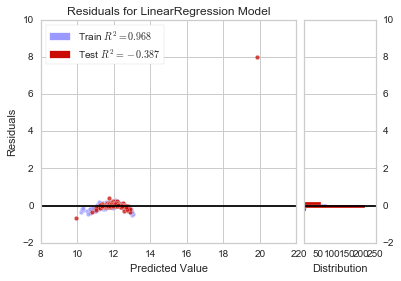

In [49]:
plot_residuals(LinearRegression(), X_train, y_train, X_valid, y_valid)

In Ridge regression, although it has excellent best score and RMSE score, the $R^2$ and the residuals are not ideal.

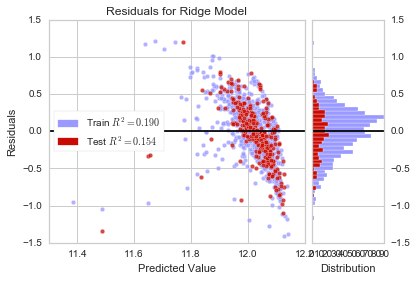

In [50]:
plot_residuals(Ridge(), X_train, y_train, X_valid, y_valid)

As for Decision Tree, all evaluation metrics that are used seem to be excellent, since all scores are very high and the residuals are spread evenly.

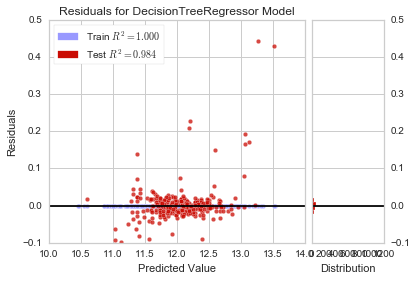

In [51]:
plot_residuals(DecisionTreeRegressor(), X_train, y_train, X_valid, y_valid)

Similary to the Decision Tree, the Random Forest model gave a good result, which was expected, because Random Forest tends to perform good in many cases. Moreover, since the Decision Tree model had a good performance, it is natural that the Random Forest model, which is a collection of decision trees, will have similar or better result.

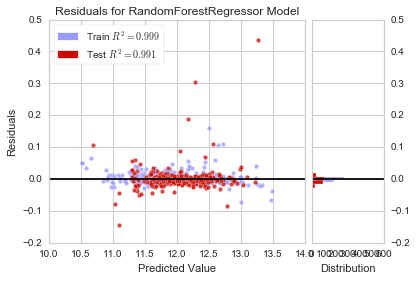

In [52]:
plot_residuals(RandomForestRegressor(n_estimators=1000, criterion='mse'), X_train, y_train, X_valid, y_valid)

The Elastic Net model had similar behaviour with the Ridge model. This not a surprise since, the Elastic Net is the combination of Ridge and Lasso. 

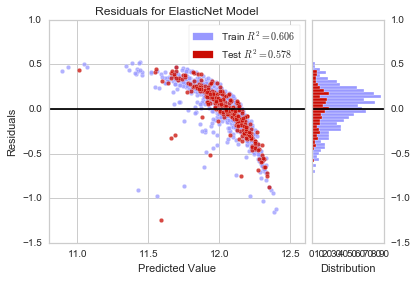

In [53]:
plot_residuals(ENet, X_train, y_train, X_valid, y_valid)

The KRR model scores were not good enough and the residuals are not spread evenly in the theoritical line (black line), hence the model is not optimal for this task.

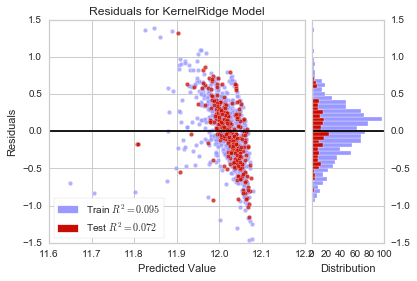

In [54]:
plot_residuals(KRR, X_train, y_train, X_valid, y_valid)

As far as GradientBoostingRegressor and XGBRegressor are concerned, both are excellent in terms of scores, $R^2$ and residual plots, which means that these two models could be used to form the final model.

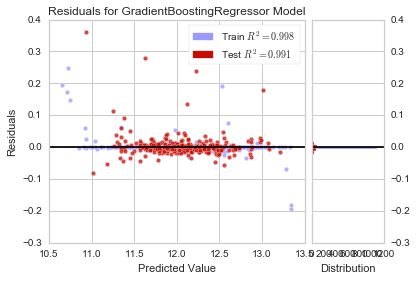

In [55]:
plot_residuals(GBoost, X_train, y_train, X_valid, y_valid)

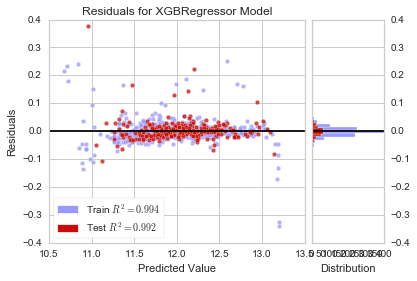

In [56]:
plot_residuals(model_xgb, X_train, y_train, X_valid, y_valid)


Finally, the SVR model had the poorest performance, as both the scores and $R^2$ had low values and the residuals are not spread across the theoretical black line.

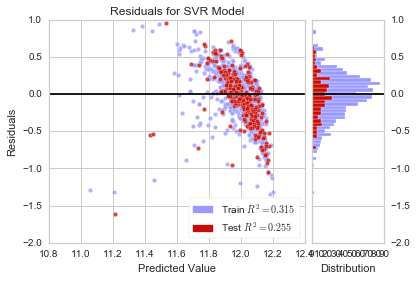

In [57]:
plot_residuals(svr, X_train, y_train, X_valid, y_valid)

In [58]:
random_forest = RandomForestRegressor(n_estimators=1000, criterion='mse')

gboost_ = GBoost

model_xgb_ = model_xgb

It is clear that not all models are ideal and the performance varies from model to model. Therefore, instead of taking one model it would be better if multiple models were combined to provide a final model. The techniques for combining the predictions obtained from the base-level models can be grouped in three combining paradigms: voting, stacking, and cascading (Arends, 2003). 

In a voting, each model provides a vote for its prediction, while in stacking, an algorithm is used to induce a meta-level model for combining the predictions. As for cascading, it is an iterative process of combining classiers (Arends, 2003).

In this problem the models that were chosen are Random Forest, GradientBoostingRegressor and XGBRegressor, because these models had the best results in terms of RMSE score, validation score, $R^2$ and the residual distribution was evenly spread across the graph, which make these models ideal to use. In addition, these models are robust to outliers and provide accurate predictions for future house prices. Therefore, the final model has an error score of 8% approximately, which is an excellent score for house pricing.

In [62]:
ensemble_model = StackingRegressor(regressors=[random_forest,gboost_,model_xgb_], 
                                   meta_regressor=SVR(kernel="rbf"))

ensemble_model.fit(X_train, y_train)

score = np.sqrt(-cross_val_score(ensemble_model, X_valid, y_valid, scoring="neg_mean_squared_error", cv=10)).mean()

print("Stacking Regressor score: {:.4f}\n".format(score))

Stacking Regressor score: 0.0817



# Conclusions & Results
In conclusion, the dataset has a lof of variables that need to be proccesed before starting the analysis. Moreover, some of the variables had NA values that did not meant a lack of informatio, for instance NA in fence means that the house has no fence. 

The principal component analysis showed that we could use much less variables if the performance is an issue, without losing much information. Also, during the regression analysis many models were build, but Random Forest GradientBoostingRegressor and XGBRegressor stand out and were combined to create the final model.


# Personal learning and future implications
Personally, I have learned how to utilise data and make more efficient datasets, without losing valuable information. This was not easy as it required a very good understanding of the data and the relationships between them. Furthermore, the use of Python and Git helped me to create a stable and reproducible code. Moreover, I obtained a better understanding of the maths and statistics that were required to build this project.

As far as the future implications are concerned, I would use different models to check if the performance and the final model change dramatically. Also, I would use cluster analysis to find unknown subgroups or clusters in data, which will help to identify and understand other aspects of the data.


# References

1.	Everitt, B. & Hothorn, T., 2011. An introduction to applied multivariate analysis with R, New York: Springer.
2.	Raschka, S., Mirajalili, V. & dawsonera, distributor, 2017. Python machine learning : machine learning and deep learning with Python, scikit-learn, and TensorFlow Second.
3.	James, G., 2013. An introduction to statistical learning with applications in R, New York, NY: Springer.
4.	Bishop, C.M., 2006. Pattern recognition and machine learning, New York: Springer.
5.	Sarkar, J., Saha, S. and Agrawal, S. (2014). An Efficient Use of Principal Component Analysis in Workload Characterization-A Study. AASRI Procedia, 8, pp.68-74.
6.	Kerlinger, F. N., and Pedhazur, E. J. (1973). Multiple Regression in Behavioral Research. Holt, Rinehart and Winston.
7.	Kaufman, D. and Sweet, R. (1974). Contrast coding in least squares regression analysis. American Educational Research Journal 11, 359-377.
8.	Rüdiger Wirth - Proceedings of the Fourth International Conference on the Practical Application of Knowledge Discovery and Data Mining , 2000
9.	Chapman, P. et al, 2000. CRISP-DM 1.0 - Step-by-step data mining guide
10. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning.
11. Ncss-wpengine.netdna-ssl.com. (2019). [online] Available at: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf [Accessed 20 Jan. 2019].
12. International Association for Statistical Computing. (1983). Computational Statistics & Data Analysis.
13. Analytics Vidhya, Learning, M. and Python, C. (2019). Complete Guide to Parameter Tuning in XGBoost. [online] Available at: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ [Accessed 20 Jan. 2019].
14. Arends, L., Vokó, Z. and Stijnen, T. (2003). Combining multiple outcome measures in a meta-analysis: an application. Statistics in Medicine, 22(8), pp.1335-1353.